# Medidas

+ m1: silent
+ m2: Intergenic Regions
+ m3: Introns
+ m4: neutral&low FI (EL impacto funcional solo está dado para Missense_Mutations)
+ m5: suma silent, intergenic e intrones

Graficar:
- m1 vs m2 (Silent Mutations vs. Intergenic Regions)
- m1 vs m3 (Silent mutations vs. Introns)
- m2 vs m3 (Intergenic Regions vs. Introns)
- m5 vs Total

Graficar x 100:
- m1 vs m4
- m2 vs m4
- m3 vs m4


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
maf = 'maf_OrdenadoxPaciente.txt'
data = pd.read_csv(maf, sep='\t')
data.columns

Index(['Unnamed: 0', 'Hugo_Symbol', 'Chromosome', 'Variant_Classification',
       'Variant_Type', 'i_HGNC_LocusType', 'is_coding', 'patient',
       'MA_Func_Impact', 'MA_FI_score'],
      dtype='object')

In [4]:
dg = data.groupby('patient')
m = {'patient':0, 'mut tot':0, 'silent':0, 'igr':0, 'intron':0, 'low&neutral FI':0}
Paciente = []
mut_tot = []
silent_mut = []
intergenic = []
intron_mut = []
suma_s_igr_int = []
lynfi = []
fisMen19 = []
l = 0
n = 0
ln = 0
smenor19=0

for (patient, Pgroup) in dg:
    #print('\n', patient, '\n')
    m['patient'] = patient
    m['mut tot'] = Pgroup.shape[0]
    #print('mut tot:',Pgroup.shape[0])
    vgg = Pgroup.groupby('Variant_Classification')
    fig = Pgroup.groupby('MA_Func_Impact')
    fis = Pgroup.groupby('MA_FI_score')
    for (Variant_Classification, Vgroup) in vgg:
        if Variant_Classification == 'Silent':
            m['silent'] = Vgroup.shape[0]
            #print(Variant_Classification, ':', Vgroup.shape[0])
        if Variant_Classification == 'IGR':
            m['igr'] = Vgroup.shape[0]
            #print(Variant_Classification, ':', Vgroup.shape[0])
        if Variant_Classification =='Intron':
            m['intron'] = Vgroup.shape[0]
            #print(Variant_Classification, ':', Vgroup.shape[0])
            #print(Variant_Classification, ':', Vgroup.shape[0])
    for(MA_Func_Impact, Fgroup) in fig:
        if MA_Func_Impact == 'low' :
            l = Fgroup.shape[0]
            #print(MA_Func_Impact,':', Fgroup.shape[0])
        if MA_Func_Impact == 'neutral':
            n = Fgroup.shape[0]
            #print(MA_Func_Impact,':', Fgroup.shape[0])
        ln = l+n
        m['low&neutral FI'] = ln
        #print(MA_Func_Impact,':', Fgroup.shape[0]) 
    for(MA_FI_score, FSgroup) in fis:
        if float(MA_FI_score) <= 1.9:
            m['Score_Menor']=FSgroup.shape[0]
            
    tt = m['silent'] + m['igr'] + m['intron']     
    Paciente.append(m['patient'])
    mut_tot.append(m['mut tot'])
    silent_mut.append(m['silent'])
    intergenic.append(m['igr'])
    intron_mut.append(m['intron'])
    lynfi.append(m['low&neutral FI'])
    fisMen19.append(m['Score_Menor'])
    suma_s_igr_int.append(tt)

paraDf = {'Patient_Id': Paciente, 'Total_Mutations': mut_tot, 'Silent_Mutations': silent_mut, 'IGR_Mutations': intergenic,
         'Intron_Mut': intron_mut, 'Low_Neutral_FI': lynfi, 'Score_Menor': fisMen19 , 'Suma_S_IGR_IN': suma_s_igr_int}

medidas = pd.DataFrame(paraDf)
# Guardando los datos sacados a un archivo de texto.
medidas.to_csv('medidasxpaciente.txt', sep='\t', encoding='utf-8')

In [5]:
medidas.describe()

,IGR_Mutations,Intron_Mut,Low_Neutral_FI,Silent_Mutations,Suma_S_IGR_IN,Total_Mutations
count,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000
mean,1.672802,1.979550,26.853783,17.768916,21.421268,78.397751
std,2.261623,3.956984,94.000665,60.036408,62.745334,266.520793
min,0.000000,0.000000,2.000000,1.000000,3.000000,1.000000
25%,1.000000,1.000000,7.000000,5.000000,8.000000,24.000000
50%,1.000000,1.000000,12.000000,8.000000,11.000000,37.000000
75%,2.000000,2.000000,22.000000,14.000000,18.000000,65.000000
max,17.000000,40.000000,1883.000000,1051.000000,1108.000000,5278.000000


# Mutaciones Totales

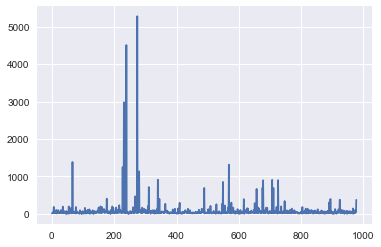

In [6]:
sns.plt.plot(mut_tot)

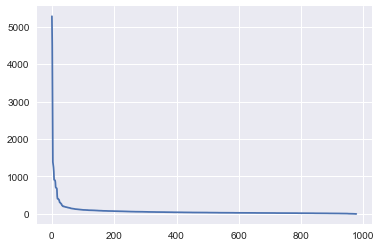

In [21]:
sns.plt.plot(sorted(mut_tot, reverse=True))

# Silent vs IGR (m1 vs m2)

array([[ 1.        ,  0.27790547],
       [ 0.27790547,  1.        ]])

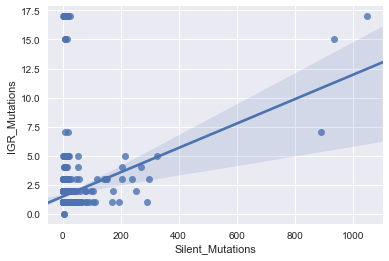

In [7]:
sns.regplot(medidas.Silent_Mutations, medidas.IGR_Mutations)
np.corrcoef(medidas.Silent_Mutations, medidas.IGR_Mutations)

# Silent vs Intron (m1 vs m3)

array([[ 1.        ,  0.47896509],
       [ 0.47896509,  1.        ]])

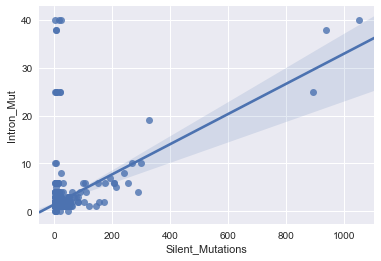

In [8]:
sns.regplot(medidas.Silent_Mutations,medidas.Intron_Mut)
np.corrcoef(medidas.Silent_Mutations,medidas.Intron_Mut)

# IGR vs Intron (m2 vs m3)

array([[ 1.     ,  0.49151],
       [ 0.49151,  1.     ]])

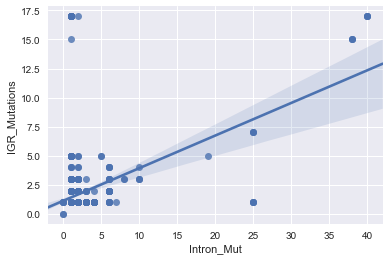

In [9]:
sns.regplot(medidas.Intron_Mut, medidas.IGR_Mutations)
np.corrcoef(medidas.Intron_Mut, medidas.IGR_Mutations)

# Mutaciones totales vs. Suma silent, IGR, Intron

array([[ 1.        ,  0.97839933],
       [ 0.97839933,  1.        ]])

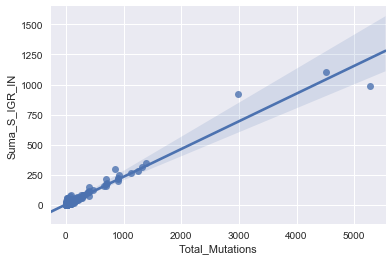

In [10]:
sns.regplot(medidas.Total_Mutations, medidas.Suma_S_IGR_IN)
np.corrcoef(medidas.Total_Mutations, medidas.Suma_S_IGR_IN)

# Silent vs Low+Neutral FI
FI = Functional Impact

array([[ 1.       ,  0.9694933],
       [ 0.9694933,  1.       ]])

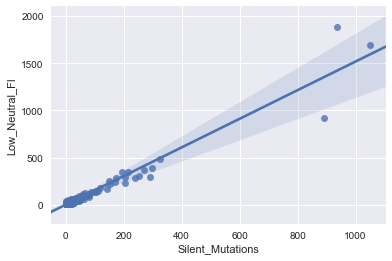

In [11]:
sns.regplot(medidas.Silent_Mutations, medidas.Low_Neutral_FI)
np.corrcoef(medidas.Silent_Mutations, medidas.Low_Neutral_FI)

# Intergenic vs Low+Neutral FI

array([[ 1.        ,  0.29476121],
       [ 0.29476121,  1.        ]])

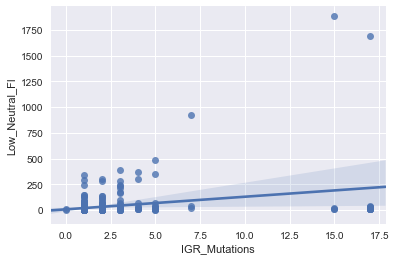

In [12]:
sns.regplot(medidas.IGR_Mutations, medidas.Low_Neutral_FI)
np.corrcoef(medidas.IGR_Mutations, medidas.Low_Neutral_FI)

# Introns vs Low+Neutral FI

array([[ 1.        ,  0.48870696],
       [ 0.48870696,  1.        ]])

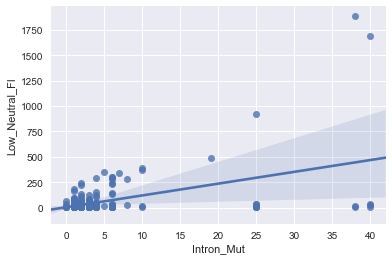

In [13]:
sns.regplot(medidas.Intron_Mut, medidas.Low_Neutral_FI)
np.corrcoef(medidas.Intron_Mut, medidas.Low_Neutral_FI)

# Suma vs Low+Neutral

array([[ 1.        ,  0.96908146],
       [ 0.96908146,  1.        ]])

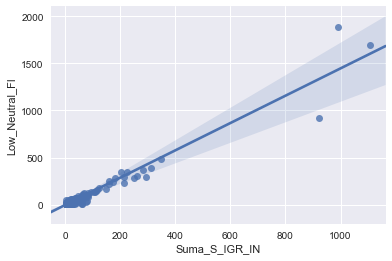

In [14]:
fig = sns.regplot(medidas.Suma_S_IGR_IN, medidas.Low_Neutral_FI)
np.corrcoef(medidas.Suma_S_IGR_IN, medidas.Low_Neutral_FI)

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=2)
fig.set_figwidth(12)
fig.set_figheight(19.5)

tit1='Silent vs Intergenic R:'+str(round((cor1), 2))
tit2= 'Silent vs Intron R:' + str(round((cor2), 2))
tit3= 'Intron vs Intergenic R:' + str(round((cor3), 2))
tit4='Silent vs Low and Neutral FI R:' + str(round((cor4), 2))
tit5='Intergenic vs Low and Neutral FI R:' + str(round((cor5), 2))
tit6='Intron vs Low and Neutral FI R:' + str(round((cor6), 2))
tit7= 'Silent+Intergenic+Intron vs Low and Neutral FI R:' + str(round((cor7), 2))
tit8 = 'FIS < 1.9 vs Low and Neutral FI R:' + str(round((cor8), 2))

sns.regplot(medidas.Silent_Mutations, medidas.IGR_Mutations, ax=axs[0,0]).set_title(tit1)
sns.regplot(medidas.Silent_Mutations,medidas.Intron_Mut, ax=axs[0,1]).set_title(tit2)
sns.regplot(medidas.Intron_Mut, medidas.IGR_Mutations, ax=axs[1,0]).set_title(tit3)
sns.regplot(medidas.Silent_Mutations, medidas.Low_Neutral_FI, ax=axs[1,1]).set_title(tit4)
sns.regplot(medidas.IGR_Mutations, medidas.Low_Neutral_FI, ax=axs[2,0]).set_title(tit5)
sns.regplot(medidas.Intron_Mut, medidas.Low_Neutral_FI, ax=axs[2,1]).set_title(tit6)
sns.regplot(medidas.Suma_S_IGR_IN, medidas.Low_Neutral_FI, ax=axs[3,0]).set_title(tit7)
sns.regplot(medidas.Score_Menor, medidas.Low_Neutral_FI).set_title(tit8)
#medidas.columns

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2)
fig.set_figwidth(12)
fig.set_figheight(9.5)

cor9 = np.corrcoef(medidas.Silent_Mutations, medidas.Score_Menor)
cor9 = cor9[0,1]
cor10 = np.corrcoef(medidas.IGR_Mutations, medidas.Score_Menor)
cor10= cor10[0,1]
cor11 = np.corrcoef(medidas.Intron_Mut, medidas.Score_Menor)
cor11 = cor11[0,1]
cor12 = np.corrcoef(medidas.Suma_S_IGR_IN, medidas.Score_Menor)
cor12 = cor12[0,1]

tit9='Silent vs FIS < 1.9 R:' + str(round((cor9), 2))
tit10='Intergenic vs  < 1.9 R:' + str(round((cor10), 2))
tit11='Intron vs  < 1.9 R:' + str(round((cor11), 2))
tit12= 'Silent+Intergenic+Intron vs  < 1.9 R:' + str(round((cor12), 2))


sns.regplot(medidas.Silent_Mutations, medidas.Low_Neutral_FI, ax=axs[0,0]).set_title(tit9)
sns.regplot(medidas.IGR_Mutations, medidas.Low_Neutral_FI, ax=axs[0,1]).set_title(tit10)
sns.regplot(medidas.Intron_Mut, medidas.Low_Neutral_FI, ax=axs[1,0]).set_title(tit11)
sns.regplot(medidas.Suma_S_IGR_IN, medidas.Low_Neutral_FI, ax=axs[1,1]).set_title(tit12)


In [15]:
medidas.to_csv('medidasxpaciente.txt', sep='\t', encoding='utf-8')